In [6]:
import pandas as pd
from os import listdir, getcwd
from os.path import isfile, join, dirname
import matplotlib.pyplot as plt

In [9]:
path = dirname(getcwd())
path = join(path, 'unprocessed')
path = join(path, "well production")
files = [join(path, f) for f in listdir(path) if isfile(join(path, f))]
data = pd.read_csv(open(files.pop()))
while len(files) > 0:
    temp = pd.read_csv(open(files.pop()))
    if "water 1" in temp.columns:
        overview = temp
    else:
        data = pd.concat([data, temp])
overview = overview.drop("Unnamed: 0", axis=1)

In [10]:
without_na = data.dropna()

In [11]:
data

easting  northing  porosity  permeability  Poisson's ratio  \
0   34100.0   18600.0      0.04         0.007            0.338   
1   34203.0   18600.0      0.07         0.019            0.338   
2   34306.0   18600.0      0.07         0.020            0.338   
3   34409.0   18600.0      0.08         0.027            0.338   
4   34512.0   18600.0      0.07         0.020            0.339   
..      ...       ...       ...           ...              ...   
95  42427.0   52200.0      0.04         0.006            0.316   
96  42530.0   52200.0      0.05         0.011            0.316   
97  42633.0   52200.0      0.04         0.006            0.316   
98  42737.0   52200.0      0.07         0.015            0.316   
99  42840.0   52200.0      0.04         0.008            0.316   

    Young's Modulus  water saturation  oil saturation  proppant weight (lbs)  \
0      9.540033e+06          0.110434        0.889566          758302.438926   
1      9.551353e+06          0.110108        0.889892                    NaN   
2      9.562734e+06          0.109783        0.890217          937076.784070   
3      9.574173e+06          0.109459        0.890541                    NaN   
4      9.585671e+06          0.109136        0.890864          977525.444002   
..              ...               ...             ...                    ...   
95     1.202942e+07          0.132636        0.867364                    NaN   
96     1.202782e+07          0.132636        0.867364          961664.809891   
97     1.202627e+07          0.132640        0.867360                    NaN   
98     1.202479e+07          0.132646        0.867354                    NaN   
99     1.202335e+07          0.132656        0.867344          218275.752743   

    pump rate (cubic feet/min)  
0                   169.671385  
1                          NaN  
2                   288.119942  
3                          NaN  
4                   351.371468  
..                         ...  
95                         NaN  
96                  254.218751  
97                         NaN  
98                         NaN  
99                  273.943820  

[10000 rows x 10 columns]

In [12]:
without_na

easting  northing  porosity  permeability  Poisson's ratio  \
0   34100.0   18600.0      0.04         0.007            0.338   
2   34306.0   18600.0      0.07         0.020            0.338   
4   34512.0   18600.0      0.07         0.020            0.339   
6   34718.0   18600.0      0.06         0.014            0.339   
8   34924.0   18600.0      0.05         0.009            0.339   
..      ...       ...       ...           ...              ...   
87  41599.0   52200.0      0.05         0.008            0.315   
90  41909.0   52200.0      0.04         0.006            0.315   
93  42220.0   52200.0      0.06         0.017            0.316   
96  42530.0   52200.0      0.05         0.011            0.316   
99  42840.0   52200.0      0.04         0.008            0.316   

    Young's Modulus  water saturation  oil saturation  proppant weight (lbs)  \
0      9.540033e+06          0.110434        0.889566           7.583024e+05   
2      9.562734e+06          0.109783        0.890217           9.370768e+05   
4      9.585671e+06          0.109136        0.890864           9.775254e+05   
6      9.608832e+06          0.108494        0.891506           6.094045e+05   
8      9.632205e+06          0.107857        0.892143           1.037507e+06   
..              ...               ...             ...                    ...   
87     1.204410e+07          0.132737        0.867263           7.378607e+05   
90     1.203821e+07          0.132677        0.867323           5.321791e+05   
93     1.203278e+07          0.132644        0.867356           8.233892e+05   
96     1.202782e+07          0.132636        0.867364           9.616648e+05   
99     1.202335e+07          0.132656        0.867344           2.182758e+05   

    pump rate (cubic feet/min)  
0                   169.671385  
2                   288.119942  
4                   351.371468  
6                   304.877677  
8                   244.923261  
..                         ...  
87                  350.190431  
90                  272.312497  
93                  258.222783  
96                  254.218751  
99                  273.943820  

[4027 rows x 10 columns]

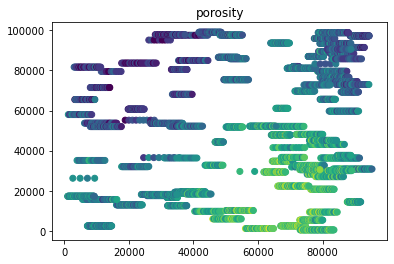

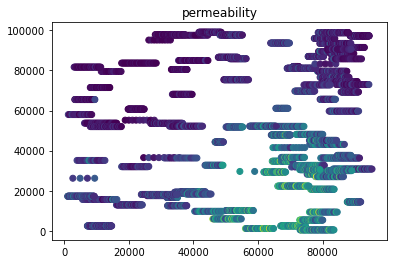

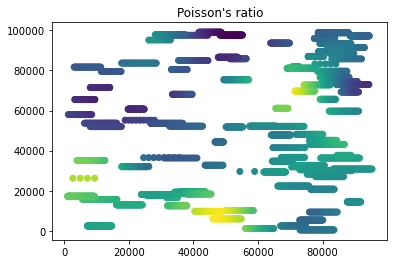

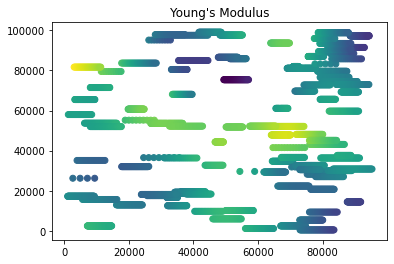

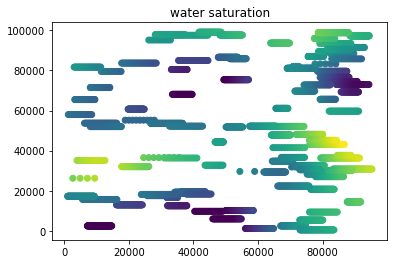

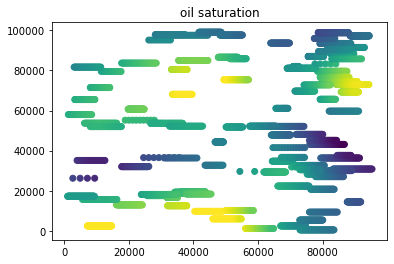

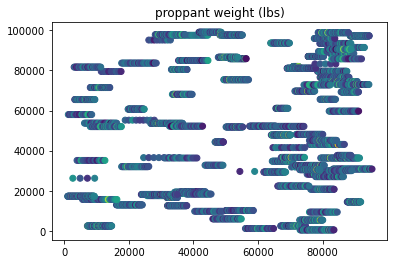

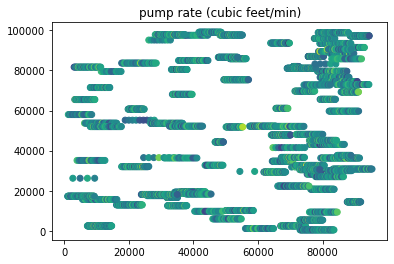

In [21]:
for x in without_na.drop(["easting", "northing"], axis=1):
    plt.figure()
    plt.scatter(without_na.easting, without_na.northing, c=without_na[x])
    plt.title(x)
    image_path = join(path, x.replace("/", "\\") +".png")
    plt.savefig(image_path)

In [14]:
overview

well name  average pressure (Pa)    oil 1    oil 2    oil 3   oil 4  \
0   Tarragon 4-119H               26180969  10809.0  10108.0   9352.0  8626.0   
1    Fennel 10-129H               36433680   2049.0   1932.0   1784.0  1649.0   
2   Federal 14-113H               36642888  11699.0  10905.0  10149.0  9365.0   
3       King 7-184H               30429506   5980.0   5580.0   5176.0  4789.0   
4     Sundae 1-129H               42591950   3892.0   3646.0   3399.0  3133.0   
..              ...                    ...      ...      ...      ...     ...   
95    Burger 6-148H               33827222   2992.0   2830.0   2592.0  2382.0   
96     King 14-184H               37076891   3258.0   3051.0   2857.0  2628.0   
97     Tribal 14-4H               32762211    861.0    836.0    762.0   694.0   
98  Pikachu 13-133H               29288793    750.0    711.0    686.0   639.0   
99     Golden 8-14H               41615511   2617.0   2452.0   2289.0  2122.0   

     oil 5   oil 6   oil 7   oil 8  ...  water 3  water 4  water 5  water 6  \
0   7856.0  7137.0  6430.0  5678.0  ...   1600.0   1481.0   1367.0   1237.0   
1   1499.0  1364.0  1226.0  1093.0  ...    254.0    210.0    205.0    200.0   
2   8521.0  7732.0  6919.0  6124.0  ...    720.0    661.0    617.0    541.0   
3   4405.0  3978.0  3581.0  3159.0  ...    502.0    471.0    453.0    417.0   
4   2834.0  2577.0  2309.0  2063.0  ...   1096.0    974.0    902.0    806.0   
..     ...     ...     ...     ...  ...      ...      ...      ...      ...   
95  2227.0  1969.0  1766.0  1590.0  ...   1123.0   1032.0    959.0    869.0   
96  2397.0  2190.0  1966.0  1742.0  ...    831.0    766.0    699.0    625.0   
97   651.0   623.0   536.0   466.0  ...     66.0     93.0     63.0     60.0   
98   554.0   515.0   460.0   423.0  ...    112.0     97.0    112.0    104.0   
99  1907.0  1767.0  1582.0  1392.0  ...    325.0    303.0    279.0    270.0   

    water 7  water 8  water 9  water 10  water 11  water 12  
0    1069.0    982.0    857.0     733.0     593.0     472.0  
1     157.0    148.0    136.0      97.0      91.0      87.0  
2     466.0    435.0    394.0     340.0     266.0     213.0  
3     346.0    343.0    275.0     231.0     238.0     164.0  
4     790.0    668.0    570.0     468.0     394.0     322.0  
..      ...      ...      ...       ...       ...       ...  
95    778.0    710.0    636.0     546.0     434.0     344.0  
96    572.0    521.0    461.0     370.0     317.0     261.0  
97     49.0     38.0     38.0      49.0      45.0      42.0  
98     49.0     75.0     75.0     102.0      73.0      65.0  
99    221.0    225.0    179.0     156.0     138.0     120.0  

[100 rows x 26 columns]

In [22]:
without_na.to_csv('completion_short.csv')

In [23]:
overview.to_csv('overview.csv')

In [24]:
data.to_csv('completion.csv')